In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
labels_df = pd.read_csv("data/labels.csv")

In [3]:
def load_features(files, path, labels_df):
    dataframes = []
    
    for file in files:
        df = pd.read_csv(f"{path}/{file}", header=None)
        participant_id = int(file.split("_")[1].split(".")[0]) # Get ID from file name
        df["Participant_ID"] = participant_id
        dataframes.append(df)
        
    # Combine into a single dataframe
    data_df = pd.concat(dataframes)
    return data_df.merge(labels_df, on="Participant_ID")

In [4]:
train_files = ["spk_303.csv", "spk_304.csv", "spk_310.csv", "spk_313.csv", "spk_316.csv", "spk_317.csv", "spk_318.csv", "spk_319.csv", "spk_322.csv", "spk_324.csv", 
               "spk_326.csv", "spk_327.csv", "spk_328.csv", "spk_330.csv", "spk_333.csv", "spk_338.csv", "spk_339.csv", "spk_340.csv", "spk_341.csv", "spk_343.csv", 
               "spk_344.csv", "spk_345.csv", "spk_347.csv", "spk_350.csv", "spk_351.csv", "spk_352.csv", "spk_353.csv", "spk_356.csv", "spk_357.csv", "spk_358.csv", 
               "spk_360.csv", "spk_364.csv", "spk_366.csv", "spk_369.csv", "spk_370.csv", "spk_371.csv", "spk_372.csv", "spk_374.csv", "spk_375.csv", "spk_376.csv", 
               "spk_379.csv", "spk_380.csv", "spk_383.csv", "spk_385.csv", "spk_386.csv", "spk_391.csv", "spk_392.csv", "spk_397.csv", "spk_400.csv", "spk_401.csv", 
               "spk_402.csv", "spk_409.csv", "spk_412.csv", "spk_414.csv", "spk_416.csv", "spk_419.csv", "spk_423.csv", "spk_425.csv", "spk_426.csv", "spk_427.csv", 
               "spk_428.csv", "spk_429.csv", "spk_430.csv", "spk_433.csv", "spk_441.csv", "spk_443.csv", "spk_445.csv", "spk_447.csv", "spk_448.csv", "spk_449.csv", 
               "spk_454.csv", "spk_455.csv", "spk_456.csv", "spk_457.csv", "spk_459.csv", "spk_463.csv", "spk_464.csv", "spk_468.csv", "spk_471.csv", "spk_473.csv", 
               "spk_475.csv", "spk_478.csv", "spk_485.csv", "spk_486.csv", "spk_487.csv", "spk_488.csv", "spk_491.csv"]

test_files = ["spk_305.csv", "spk_312.csv", "spk_315.csv", "spk_320.csv", "spk_321.csv", "spk_325.csv", "spk_336.csv", "spk_348.csv", "spk_355.csv", "spk_362.csv", 
              "spk_363.csv", "spk_368.csv", "spk_393.csv", "spk_415.csv", "spk_434.csv", "spk_437.csv", "spk_444.csv", "spk_446.csv", "spk_474.csv", "spk_479.csv", ]

train_df = load_features(train_files,"data/features_train/features_train", labels_df)
test_df = load_features(test_files, "data/features_test", labels_df)

In [5]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,Participant_ID,Depression,Gender
0,37.110800,0.016898,36.521458,37.090477,37.525204,1.003746,24.374560,11.693271,-0.207191,9.438403,...,6.140351,4.629630,0.142,0.117541,0.070000,0.027386,-39.496513,303,0,0
1,33.466145,0.081636,30.579086,32.893642,35.499447,4.920361,12.148806,0.000000,16.623375,0.000000,...,2.142857,2.222222,0.210,0.072572,0.162500,0.084963,-40.960510,303,0,0
2,31.222300,0.035549,30.420216,30.726269,31.939356,1.519140,6.691987,0.000000,23.152794,0.000000,...,2.941176,1.587302,0.230,0.000000,0.185000,0.065000,-42.518540,303,0,0
3,34.281920,0.031365,32.879463,34.713913,35.204903,2.325439,3.409068,0.000000,10.839425,0.000000,...,3.947368,2.816901,0.180,0.000000,0.100000,0.024495,-44.036240,303,0,0
4,34.795260,0.018941,34.109280,34.899593,35.433464,1.324184,16.008287,14.265874,10.287021,6.374829,...,4.000000,2.040816,0.272,0.109435,0.163333,0.170945,-42.155136,303,0,0


In [6]:
# Handle missing values
train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)

# Separate features and labels
X_train = train_df.drop(["Participant_ID", "Depression", "Gender"], axis=1)
y_train_depression = train_df["Depression"]
y_train_gender = train_df["Gender"]

X_test = test_df.drop(["Participant_ID", "Depression", "Gender"], axis=1)
y_test_depression = test_df["Depression"]
y_test_gender = test_df["Gender"]

In [7]:
def calculate_accuracy(y_true, y_pred, gender):

    accuracy = accuracy_score(y_true, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    tpr = tp / (tp + fn) # True Positive Rate
    tnr = tn / (tn + fp) # True Negative Rate
    fpr = fp / (fp + tn) # False Positive Rate
    fnr = fn / (fn + tp) # False Negative Rate
    
    metrics = {
        "accuracy": accuracy,
        "balanced_accuracy": balanced_accuracy,
        "tpr": tpr,
        "tnr": tnr,
        "fpr": fpr,
        "fnr": fnr
    }
    
    print(f"Metrics for {gender}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
    print(f"True Positive Rate (TPR): {tpr:.2f}")
    print(f"True Negative Rate (TNR): {tnr:.2f}")
    print(f"False Positive Rate (FPR): {fpr:.2f}")
    print(f"False Negative Rate (FNR): {fnr:.2f}")
    
    return metrics
def metrics(y_pred, threshold):
    test_df_depression = test_df.copy()
    test_df_depression["predictions"] = y_pred

    participant_predictions_depression = test_df_depression.groupby("Participant_ID")["predictions"].mean()
    participant_predictions_depression_binarized = (participant_predictions_depression >= threshold).astype(int)
    participant_labels_depression = test_df_depression.groupby("Participant_ID")["Depression"].first()
    male_participants = test_df_depression[test_df_depression["Gender"] == 1]["Participant_ID"].unique()
    female_participants = test_df_depression[test_df_depression["Gender"] == 0]["Participant_ID"].unique()
    
    all_metrics_depression = calculate_accuracy(participant_labels_depression, participant_predictions_depression_binarized, "All participants")
    print("")
    male_metrics = calculate_accuracy(participant_labels_depression.loc[male_participants], participant_predictions_depression_binarized.loc[male_participants], "Male participants")
    print("")
    female_metrics = calculate_accuracy(participant_labels_depression.loc[female_participants], participant_predictions_depression_binarized.loc[female_participants], "Female participants")
    
    eo = (1 - abs(male_metrics["tpr"] - female_metrics["tpr"]))
    print(f"Equality of Opportunity (EO): {eo:.2f}")
    return all_metrics_depression, male_metrics, female_metrics, eo

In [8]:
# Depression Classification
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train_depression)

y_pred = model.predict(X_test)
print(classification_report(y_test_depression, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2615
           1       0.22      0.09      0.13       665

    accuracy                           0.75      3280
   macro avg       0.51      0.50      0.49      3280
weighted avg       0.68      0.75      0.71      3280


In [9]:
all, male, female, eo = metrics(y_pred, 0.15)

Metrics for All participants:
Accuracy: 0.60
Balanced Accuracy: 0.48
True Positive Rate (TPR): 0.17
True Negative Rate (TNR): 0.79
False Positive Rate (FPR): 0.21
False Negative Rate (FNR): 0.83

Metrics for Male participants:
Accuracy: 0.67
Balanced Accuracy: 0.36
True Positive Rate (TPR): 0.00
True Negative Rate (TNR): 0.73
False Positive Rate (FPR): 0.27
False Negative Rate (FNR): 1.00

Metrics for Female participants:
Accuracy: 0.50
Balanced Accuracy: 0.60
True Positive Rate (TPR): 0.20
True Negative Rate (TNR): 1.00
False Positive Rate (FPR): 0.00
False Negative Rate (FNR): 0.80
Equality of Opportunity (EO): 0.80


In [34]:
# Calculate the prevalence of depression by gender
depression_by_gender = train_df.groupby('Gender')['Depression'].mean()

# Determine the number of samples per gender
samples_per_gender = train_df['Gender'].value_counts()

# Calculate total number of samples
total_samples = len(train_df)

inverse_prevalence = 1 / depression_by_gender

# Calculate the inverse representation (less represented genders get higher weight)
inverse_representation = total_samples / samples_per_gender

# Combine these factors to determine final weights
# The product of inverse prevalence and inverse representation gives a weight that accounts for both factors
final_weights = inverse_prevalence * inverse_representation

# Normalize weights to ensure they are manageable and practical for model training
normalized_weights = final_weights / final_weights.sum() * len(final_weights)
print(samples_per_gender)
# Apply the computed weights to each sample
train_df['weights'] = train_df['Gender'].map(normalized_weights)

reweights = train_df['weights']

Gender
1    8177
0    5449
Name: count, dtype: int64
Gender
1    0.799795
0    1.200205
Name: count, dtype: float64


In [30]:
# Train a Random Forest classifier using the weights
model_reweighted = RandomForestClassifier(random_state=42, class_weight='balanced')
model_reweighted.fit(X_train, y_train_depression, sample_weight=reweights)

y_pred_reweighted = model_reweighted.predict(X_test)
print(classification_report(y_test_depression, y_pred_reweighted))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      2615
           1       0.18      0.09      0.12       665

    accuracy                           0.73      3280
   macro avg       0.49      0.49      0.48      3280
weighted avg       0.67      0.73      0.70      3280


In [32]:
all_reweighted, male_reweighted, female_reweighted, eo_reweighted = metrics(y_pred_reweighted, 0.15)

Metrics for All participants:
Accuracy: 0.55
Balanced Accuracy: 0.44
True Positive Rate (TPR): 0.17
True Negative Rate (TNR): 0.71
False Positive Rate (FPR): 0.29
False Negative Rate (FNR): 0.83

Metrics for Male participants:
Accuracy: 0.67
Balanced Accuracy: 0.36
True Positive Rate (TPR): 0.00
True Negative Rate (TNR): 0.73
False Positive Rate (FPR): 0.27
False Negative Rate (FNR): 1.00

Metrics for Female participants:
Accuracy: 0.38
Balanced Accuracy: 0.43
True Positive Rate (TPR): 0.20
True Negative Rate (TNR): 0.67
False Positive Rate (FPR): 0.33
False Negative Rate (FNR): 0.80
Equality of Opportunity (EO): 0.80


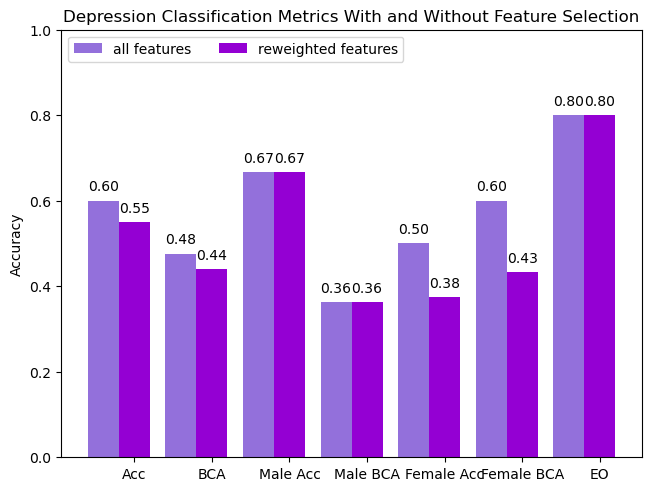

In [33]:
measures = ['Acc', 'BCA', 'Male Acc', 'Male BCA', 'Female Acc', 'Female BCA', 'EO']
vals = {
    'all features': [all['accuracy'], all['balanced_accuracy'], 
                     male['accuracy'], male['balanced_accuracy'], 
                     female['accuracy'], female['balanced_accuracy'], eo],
    'reweighted features': [all_reweighted['accuracy'], all_reweighted['balanced_accuracy'], 
                     male_reweighted['accuracy'], male_reweighted['balanced_accuracy'], 
                     female_reweighted['accuracy'], female_reweighted['balanced_accuracy'], eo_reweighted]
}
x = np.arange(len(measures))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in vals.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color='mediumpurple' if attribute=='all features' else 'darkviolet')
    ax.bar_label(rects,fmt='%.2f', padding=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Depression Classification Metrics With and Without Feature Selection')
ax.set_xticks(x + width, measures)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()